# CIFAR-10 Dataset

The CIFAR-10 dataset is a well-known dataset in the field of machine learning and computer vision. It was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset is widely used for benchmarking machine learning algorithms, particularly in the area of image classification.

#### Details of CIFAR-10 Dataset:
- **Composition**: The CIFAR-10 dataset consists of 60,000 color images in 10 classes, with 6,000 images per class.
- **Classes**: The 10 classes represent different types of objects: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
- **Image Size**: Each image is 32x32 pixels and has three color channels (RGB).
- **Training and Test Sets**: The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.

#### Usage:
The CIFAR-10 dataset is used to train and evaluate machine learning models. Its relatively small image size and variety of classes make it an ideal dataset for testing image classification algorithms.

#### Citation:
If you use the CIFAR-10 dataset in your research, it is customary to cite the following paper:
```plaintext
Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images. Technical report, University of Toronto.
```

### Jupyter Notebook Code

Below is the updated Jupyter Notebook code that builds and visualizes a neural network using the CIFAR-10 dataset:

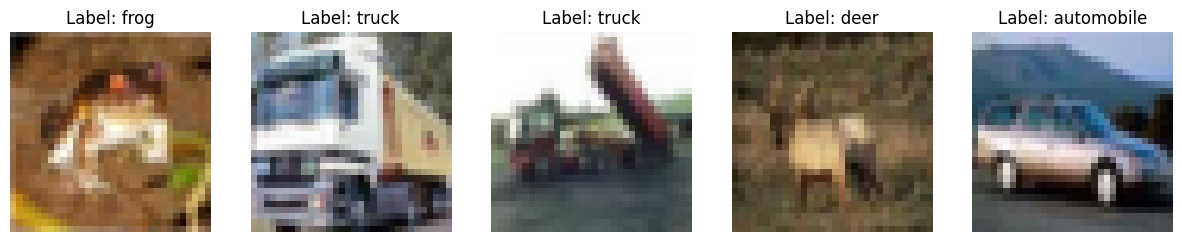

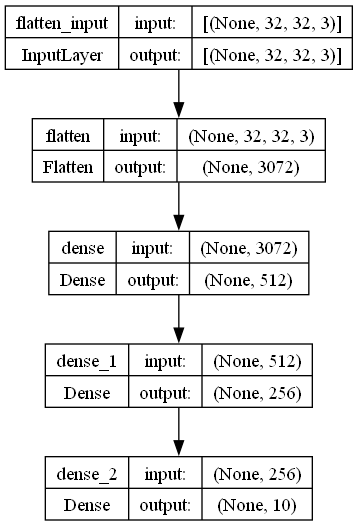

In [1]:
# TensorFlow Neural Network Tutorial with CIFAR-10 Dataset

# In this tutorial, we will create a neural network using TensorFlow, one of the most popular deep learning libraries.
# We will build a simple neural network with at least three layers and train it on the CIFAR-10 dataset.
# This tutorial assumes you have basic knowledge of Python and machine learning concepts.

# Step 1: Install TensorFlow and other necessary libraries
# First, ensure that you have TensorFlow installed. You can install it using pip:
# !pip install tensorflow
# !pip install pydot
# !pip install graphviz

# Step 2: Import Required Libraries
# We will start by importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Ensure Graphviz is in the system path (only necessary for certain setups)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Step 3: Load and Preprocess the Data
# We will use the CIFAR-10 dataset, a collection of 32x32 color images in 10 classes.
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display five items from the dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Label: {class_names[y_train[i][0]]}')
    axes[i].axis('off')
plt.show()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Build the Neural Network Model
# We will create a simple neural network with three layers using TensorFlow's Keras API.
# Create the model
model = Sequential()

# Add the input layer and first hidden layer
model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input image
model.add(Dense(512, activation='relu'))

# Add the second hidden layer
model.add(Dense(256, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Step 5: Visualize the Model
# Use plot_model to create a graphical representation of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the model plot
Image(filename='model_plot.png')

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8548 - accuracy: 0.3290 - val_loss: 1.7340 - val_accuracy: 0.3711
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6726 - accuracy: 0.4006 - val_loss: 1.6080 - val_accuracy: 0.4165
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5842 - accuracy: 0.4325 - val_loss: 1.5958 - val_accuracy: 0.4190
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5353 - accuracy: 0.4498 - val_loss: 1.5021 - val_accuracy: 0.4647
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4988 - accuracy: 0.4629 - val_loss: 1.5271 - val_accuracy: 0.4615
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4697 - accuracy: 0.4745 - val_loss: 1.5226 - val_accuracy: 0.4594
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4460 - accuracy: 0.4842 - val_loss: 1.4752 -

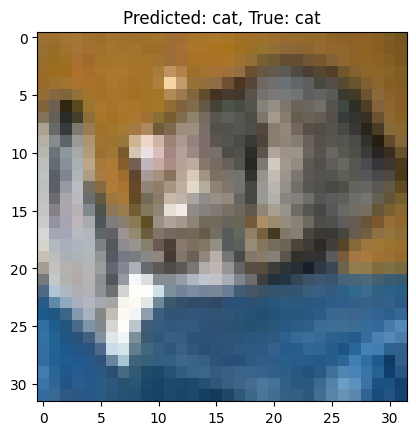

Correct prediction: cat


In [2]:
# Step 6: Compile the Model
# Next, we need to compile the model. We will use the Adam optimizer and categorical cross-entropy loss function.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# We will train the model using the training data.
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 8: Evaluate the Model
# Finally, we will evaluate the model using the test data.
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Step 9: Make a Prediction
# Let's take one item from the test set and make a prediction
index = 0  # You can change this index to test different items
test_image = x_test[index].reshape(1, 32, 32, 3)
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)
true_label = np.argmax(y_test[index])

# Display the test image and prediction result
plt.imshow(x_test[index])
plt.title(f'Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}')
plt.show()

# Check if the prediction is correct
if predicted_label == true_label:
    print(f'Correct prediction: {class_names[predicted_label]}')
else:
    print(f'Incorrect prediction: Predicted {class_names[predicted_label]}, but true label is {class_names[true_label]}')

### Explanation of Steps
1. **Installation of Required Libraries**: Ensure `tensorflow`, `pydot`, and `graphviz` are installed.
2. **Import Libraries**: Import necessary libraries for building the neural network and visualizing the dataset and model.
3. **Load and Preprocess the Data**: Load the CIFAR-10 dataset, display five sample images with their labels, normalize the data, and one-hot encode the labels.
4. **Build the Neural Network Model**: Create a neural network model with three layers: an input layer that flattens the image, two hidden dense layers, and an output layer.
5. **Visualize the Model**: Use `plot_model` to create a graphical representation of the model and display it as an image.
6. **Compile the Model**: Compile the model with the Adam optimizer and categorical cross-entropy loss function.
7. **Train the Model**: Train the model using the training data.
8. **Evaluate the Model**: Evaluate the model using the test data.
9. **Make a Prediction**: Make a prediction on one of the test images and display the image along with the predicted and true labels.

By following these steps, you can create and visualize a neural network model for the CIFAR-10 dataset using `plot_model` to generate and display the model architecture.